In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pytz
from skyfield import api, data
import satpred
import skychart

In [2]:
plt.rcParams['figure.figsize'] = [15, 15]

In [3]:
load = api.Loader('./data')

In [4]:
ts = load.timescale()
ephemeris = load('de421.bsp')
satellites = load.tle('http://celestrak.com/NORAD/elements/stations.txt', reload=True)
with load.open(data.hipparcos.URL) as f:
    df = data.hipparcos.load_dataframe(f)

[#################################] 100% stations.txt


In [5]:
sun = ephemeris['sun']
earth = ephemeris['earth']
iss = satellites['ISS']
manhattan_beach_ca_usa = api.Topos(latitude='33.881519 N', longitude='118.388177 W', elevation_m=33)
pacific = pytz.timezone('US/Pacific')
bright_stars = df[df['magnitude'] <= 5.]
more_stars = df[df['magnitude'] <= 7.]

In [6]:
d0 = datetime.datetime(2019, 6, 1, 0, 0)
t0 = ts.utc(pacific.localize(d0))
d1 = datetime.datetime(2019, 6, 11, 0, 0)
t1 = ts.utc(pacific.localize(d1))

In [7]:
df = satpred.SatelliteEphemeris(t0, t1, iss, manhattan_beach_ca_usa, earth, sun).to_dataframe()

In [8]:
columns = ['date', 'peak_magnitude', 'start', 'start_alt', 'start_az', 'start_d', 'culm', 'culm_alt', 
         'culm_az', 'culm_d', 'end', 'end_alt', 'end_az', 'end_d']

In [9]:
df[columns]

,date,peak_magnitude,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d
0,2019-06-01,0.2,22:51:21,10,NW,1498,22:52:49,24,NW,920,22:52:50,24,NW,918
1,2019-06-02,-2.1,22:02:03,10,NNW,1497,22:05:08,34,NE,710,22:05:08,34,NE,710
2,2019-06-03,-1.6,21:12:57,10,NNW,1496,21:15:33,20,NNE,1018,21:17:29,13,ENE,1305
3,2019-06-03,-0.0,22:49:11,10,WNW,1496,22:50:18,18,WNW,1097,22:50:19,18,WNW,1095
4,2019-06-04,-3.4,21:59:32,10,NW,1496,22:02:43,72,WSW,439,22:02:43,72,WSW,439
5,2019-06-05,-3.4,21:10:06,10,NW,1495,21:13:24,53,NE,514,21:15:11,23,ESE,920
6,2019-06-06,-1.6,21:57:45,10,WNW,1494,22:00:23,21,SW,978,22:00:33,21,SW,981
7,2019-06-07,-2.9,21:07:50,10,WNW,1493,21:11:01,43,SW,596,21:13:09,18,SSE,1088
8,2019-06-09,-0.9,21:06:43,10,W,1490,21:08:28,13,SW,1291,21:10:12,10,SSW,1488


In [10]:
satephem = satpred.SatelliteEphemeris(t0, t1, iss, manhattan_beach_ca_usa, earth, sun, visible=False)
df = satephem.to_dataframe()

In [11]:
columns = ['date', 'start', 'start_alt', 'start_az', 'start_d', 'culm', 'culm_alt', 
         'culm_az', 'culm_d', 'end', 'end_alt', 'end_az', 'end_d', 'pass_type']

In [12]:
df[columns]

,date,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d,pass_type
0,2019-06-01,14:43:46,10,S,1467,14:46:36,27,SE,828,14:49:27,10,ENE,1479,daylight
1,2019-06-01,16:20:29,10,W,1475,16:23:14,24,NW,905,16:26:00,10,NNE,1486,daylight
2,2019-06-01,22:51:21,10,NW,1498,22:54:41,66,NE,457,22:58:02,10,SE,1495,visible
3,2019-06-02,13:55:31,10,SSE,1467,13:57:17,14,SE,1261,13:59:04,10,E,1474,daylight
4,2019-06-02,15:30:30,10,WSW,1472,15:33:39,41,NW,601,15:36:50,10,NNE,1483,daylight
5,2019-06-02,22:02:03,10,NNW,1497,22:05:09,34,NE,710,22:08:16,10,ESE,1496,visible
6,2019-06-02,23:39:16,10,W,1497,23:41:37,18,SW,1105,23:43:59,10,S,1493,eclipsed
7,2019-06-03,14:40:51,10,SW,1469,14:44:09,85,NW,413,14:47:29,10,NE,1481,daylight
8,2019-06-03,16:20:08,10,NW,1481,16:21:16,11,NNW,1405,16:22:24,10,N,1485,daylight
9,2019-06-03,21:12:57,10,NNW,1496,21:15:33,20,NNE,1018,21:18:09,10,E,1496,visible


In [13]:
df[df['pass_type'] == 'visible'][columns]

,date,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d,pass_type
2,2019-06-01,22:51:21,10,NW,1498,22:54:41,66,NE,457,22:58:02,10,SE,1495,visible
5,2019-06-02,22:02:03,10,NNW,1497,22:05:09,34,NE,710,22:08:16,10,ESE,1496,visible
9,2019-06-03,21:12:57,10,NNW,1496,21:15:33,20,NNE,1018,21:18:09,10,E,1496,visible
10,2019-06-03,22:49:11,10,WNW,1496,22:52:17,34,SW,697,22:55:22,10,SSE,1492,visible
14,2019-06-04,21:59:32,10,NW,1496,22:02:52,74,SW,434,22:06:13,10,SE,1493,visible
17,2019-06-05,21:10:06,10,NW,1495,21:13:24,53,NE,514,21:16:41,10,ESE,1493,visible
22,2019-06-06,21:57:45,10,WNW,1494,22:00:23,21,SW,978,22:03:01,10,S,1490,visible
26,2019-06-07,21:07:50,10,WNW,1493,21:11:01,43,SW,596,21:14:13,10,SSE,1490,visible
34,2019-06-09,21:06:43,10,W,1490,21:08:28,13,SW,1291,21:10:12,10,SSW,1488,visible


In [14]:
above_alt_40 = df['culm_alt'] > 40. 
visible = df['pass_type'] == 'visible'
df[visible & above_alt_40][columns]

,date,start,start_alt,start_az,start_d,culm,culm_alt,culm_az,culm_d,end,end_alt,end_az,end_d,pass_type
2,2019-06-01,22:51:21,10,NW,1498,22:54:41,66,NE,457,22:58:02,10,SE,1495,visible
14,2019-06-04,21:59:32,10,NW,1496,22:02:52,74,SW,434,22:06:13,10,SE,1493,visible
17,2019-06-05,21:10:06,10,NW,1495,21:13:24,53,NE,514,21:16:41,10,ESE,1493,visible
26,2019-06-07,21:07:50,10,WNW,1493,21:11:01,43,SW,596,21:14:13,10,SSE,1490,visible


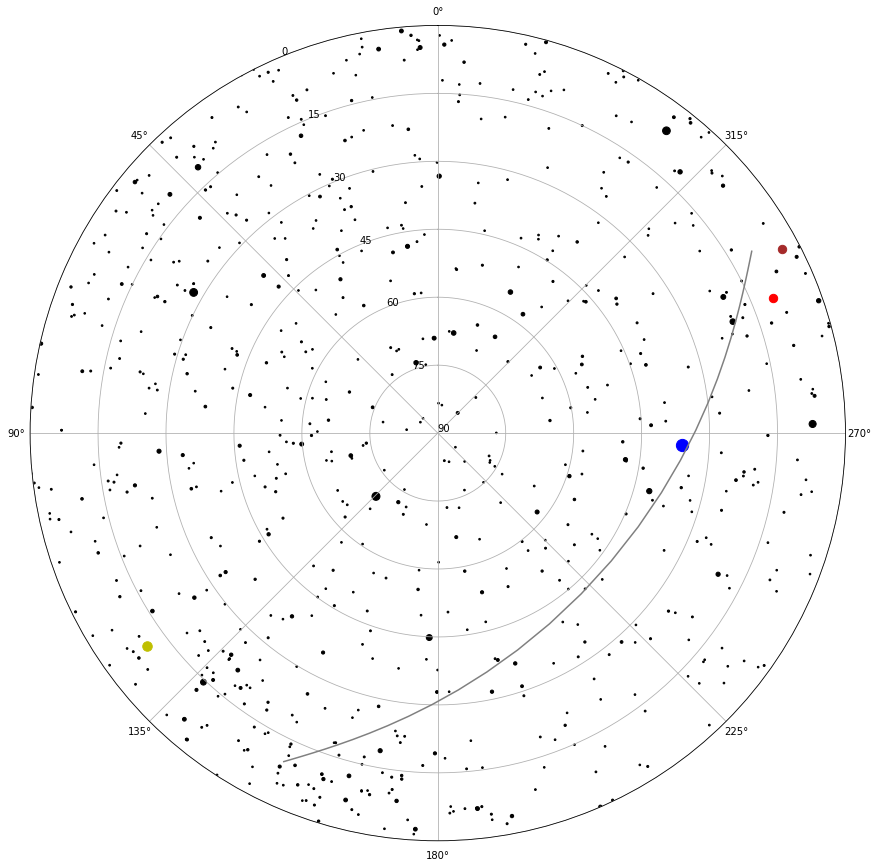

In [15]:
satellite_pass = satephem.passes[26]
chart = skychart.AltAzFullSkyChart(satellite_pass.topos + earth, satellite_pass.start_time)
chart.plot_stars(bright_stars)
chart.plot_ephemeris_object(ephemeris['sun'], 150, 'y')
chart.plot_ephemeris_object(ephemeris['moon'], 150, 'b')
chart.plot_ephemeris_object(ephemeris['mercury'], 70, 'brown')
chart.plot_ephemeris_object(ephemeris['venus'], 90, 'g')
chart.plot_ephemeris_object(ephemeris['mars'], 70, 'r')
chart.plot_ephemeris_object(ephemeris['JUPITER BARYCENTER'], 90, 'y')
chart.plot_ephemeris_object(ephemeris['SATURN BARYCENTER'], 80, 'y')
chart.plot_satellite_pass(satellite_pass)
chart.display()

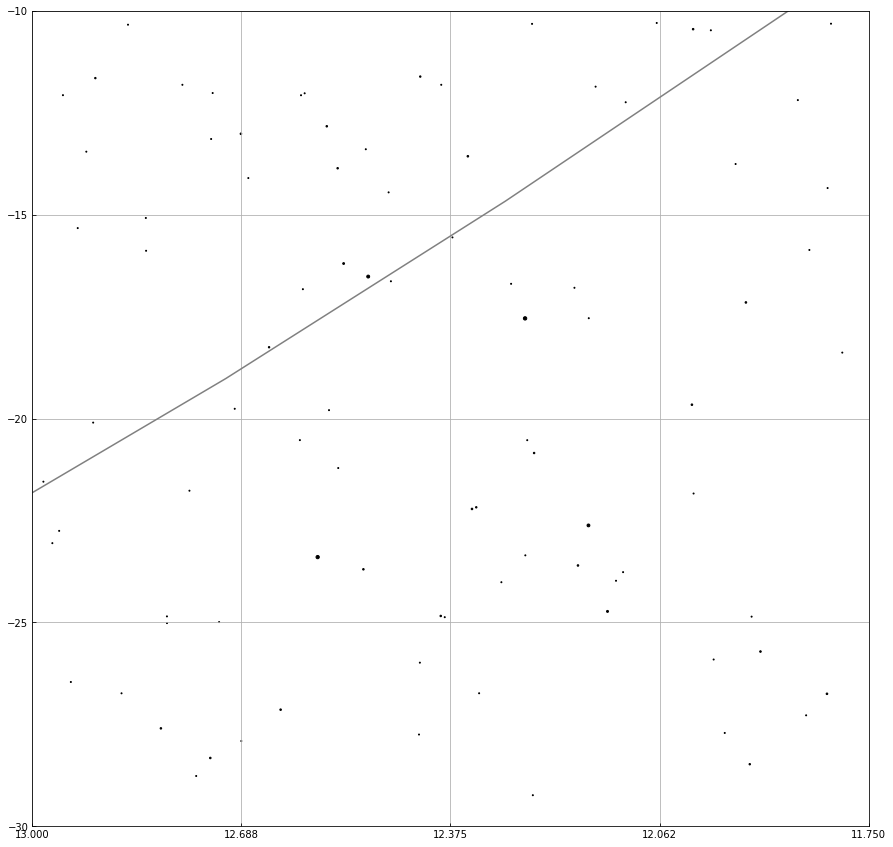

In [16]:
chart = skychart.RADecSkyChart(satellite_pass.topos + earth, satellite_pass.start_time, (13.0, 11.75), (-30, -10))
chart.plot_stars(more_stars)
chart.plot_satellite_pass(satellite_pass)
chart.display()